# Saut à l'élastique: Bungee Jumping

<img src="images/bungee_jumping.jpg" style="width:300px;"/>

(C) Wikipedia

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

## Modélisation

1. Phase 1: chute libre

2. Phase 2: oscillation élastique

modèle **pendule élastique**

<img src="images/pendule_elastique1.png" style="width:300px;"/>

Un pendule élastique est constitué d'une tige mince de poids négligeable sur laquelle s'enroule un ressort. A l'extrémité du ressort est accrochée une masselotte  considérée comme 'ponctuelle'.

### Phase d'analyse

Quelles sont les questions à se poser !


### Questions

 1. Quels sont les degrés de liberté du système ?
 2. Quels sont les paramètres du système ?
 3. Comment obtenir les équations du mouvement (PFD et bilan des forces) ?

### degrés de liberté

 - système à 2 degrés de liberté (mouvement plan) (position de A)
    
 - choix des ddl:
    1. angle $\theta(t)$ du pendule
    2. allongement $r(t)$ du ressort 
    
    $$ l(t) = l_0 + r(t) $$

### paramètres

  - $g$ , $l_0$, $k$, $m$
  
  - et $T_{max}$

### Bilan des forces

 - poids $\vec{P} = -mg \vec{e}_y$  suivant la verticale $\vec{e}_y$
 - tension du ressort $\vec{T} = -k r \vec{e}_n$ suivant l'axe de la tige $\vec{e}_n$
 
 Principe fondamentale de la dynamique 
 $$\vec{P} + \vec{T} = m \vec{\gamma}$$
 
 $\leadsto$ 2 équations pour 2 inconnues

## Mise en équation

- utilisation du calcul formel
- définition des ddl (dynamicsymbols)
- définition des parametres (symbols)
- définition des repères (ReferenceFrame) et des position (Point)

In [2]:
from sympy.physics.mechanics import dynamicsymbols, Point, ReferenceFrame

m,g,k,l0 = sp.symbols('m g k l_0')
t = sp.symbols("t")
theta,r  = dynamicsymbols('theta r')

In [3]:
# Repere et points
O = Point('O')
R0 = ReferenceFrame("R_0")
R1 = ReferenceFrame("R_1")
R1.orient(R0,'Axis',[theta,R0.z])
A = Point('A')
A.set_pos(O,-(l0+r)*R1.y)
# vitesse
O.set_vel(R0,0)

In [4]:
# calcul acceleration du pendule
display("V(A)/R0=",A.vel(R0).simplify())
MA = m*A.acc(R0).simplify()
display("m*Acc(A)/R0=",MA)

'V(A)/R0='

(l_0 + r)*theta'*R_1.x - r'*R_1.y

'm*Acc(A)/R0='

m*((l_0 + r)*theta'' + 2*r'*theta')*R_1.x + m*((l_0 + r)*theta'**2 - r'')*R_1.y

In [5]:
# bilan des forces
P = -m*g*R0.y
T = k*r*R1.y
F = (P+T).express(R1).simplify()
display("Forces=",F)

'Forces='

- g*m*sin(theta)*R_1.x + (-g*m*cos(theta) + k*r)*R_1.y

In [6]:
eq1 = (MA-F).dot(R1.x).simplify().expand()
eq2 = (MA-F).dot(R1.y).simplify().expand()
display("eq1=",eq1)
display("eq2=",eq2)

'eq1='

g*m*sin(theta) + l_0*m*theta'' + m*r*theta'' + 2*m*r'*theta'

'eq2='

g*m*cos(theta) - k*r + l_0*m*theta'**2 + m*r*theta'**2 - m*r''

### paramétrage des équations

$$\omega_1^2 = \frac{g}{l_0} \mbox{ et } \omega_2^2 = \frac{k}{m} = \frac{\omega_1^2}{\alpha} $$

2 paramètres $\omega_1$ et $\alpha$

In [7]:
x = dynamicsymbols('x')
omega1,alpha = sp.symbols("omega_1 alpha")
rel12 = {r : l0*x, l0:g/omega1**2,m:k*alpha/omega1**2}
eq11 = (eq1.subs(rel12).simplify()*omega1**4/(k*g*alpha)).expand()
display("eq1",eq11)
eq22 = (eq2.subs(rel12).simplify()*omega1**4/(k*g*alpha)).expand()
display("eq2",eq22)

'eq1'

omega_1**2*sin(theta) + x*theta'' + 2*theta'*x' + theta''

'eq2'

omega_1**2*cos(theta) + x*theta'**2 + theta'**2 - x'' - omega_1**2*x/alpha

### Validation cas limites

- pendule simple $x\approx cste=\alpha$ 1ddl $\theta(t)$

   $$ (1+\alpha)\ddot{\theta} + \omega_1^2 \theta = 0 $$
   
- ressort simple $\theta \approx 0$ 1 ddl $x(t)$ 

   $$ \ddot{x} + \omega_2^2 (x - \alpha) = 0 $$

### linéarisation: système en petites oscillations

$\theta \ll 1$ et $x-\alpha \ll 1$$

In [8]:
display(eq11)
eq11.subs({sp.sin(theta):theta,x.diff(t):0,x:alpha})

omega_1**2*sin(theta) + x*theta'' + 2*theta'*x' + theta''

alpha*theta'' + omega_1**2*theta + theta''

In [9]:
display(eq22)
eq22.subs({sp.cos(theta):1,theta.diff(t)**2:0})

omega_1**2*cos(theta) + x*theta'**2 + theta'**2 - x'' - omega_1**2*x/alpha

omega_1**2 - x'' - omega_1**2*x/alpha

### Propriétés du système

Système mécanique **conservatif**

 $$ E_c + E_p = cste$$
 
- énergie cinétique $E_c = \frac{1}{2} m v^2$
- énergie potentielle $Ep_1 = m g y$ et $Ep_2 = \frac{1}{2} k r^2$

Expression en fonction des paramètres

 adimensionnalisation des équations par $ml_0^2$
 
 - $E_c = \frac{1}{2} \left(((1+x)\dot{\theta})^2 + (\dot{x})^2\right)$
 
 - $Ep_1 = -\omega_1^2 (1+x) \cos\theta$ et $Ep_2 = \frac{1}{2} \omega_2^2 x^2$

## Simulation numérique

Transformation en ODE d'ordre 1

$$ \dot{Y} = F(Y,t) \mbox{ avec } Y = [\theta, x, \dot{\theta}, \dot{x} ] $$

In [10]:
display(eq11)
f1 = (theta.diff(t,2)*(1+x)-eq11).simplify()/(1+x)
display("Eq1",sp.Eq(theta.diff(t,2),f1))
F1 = sp.lambdify([omega1,alpha,theta,x,theta.diff(t),x.diff(t)],f1,'numpy')

omega_1**2*sin(theta) + x*theta'' + 2*theta'*x' + theta''

'Eq1'

Eq(theta'', (-omega_1**2*sin(theta) - 2*theta'*x')/(x + 1))

In [11]:
display(eq22)
f2 = x.diff(t,2)+eq22
display("Eq2",sp.Eq(x.diff(t,2),f2))
F2 = sp.lambdify([omega1,alpha,theta,x,theta.diff(t),x.diff(t)],f2,'numpy')

omega_1**2*cos(theta) + x*theta'**2 + theta'**2 - x'' - omega_1**2*x/alpha

'Eq2'

Eq(x'', omega_1**2*cos(theta) + x*theta'**2 + theta'**2 - omega_1**2*x/alpha)

In [12]:
def Smb(Y,t):
    """Calcul smbd EDO dy/dt = F(Y,t)"""
    global Omega1, Alpha
    dYdt = np.array([Y[2], Y[3], 
            F1(Omega1,Alpha,Y[0],Y[1],Y[2],Y[3]), 
            F2(Omega1,Alpha,Y[0],Y[1],Y[2],Y[3])])
    return dYdt

In [13]:
from scipy.integrate import odeint

def Solution(Y0,Tmax,N):
    """Calcul solution avec une CI Y0 sur un temps Tmax en N points"""
    global Omega1, Omega2, Alpha
    print("Solution pour omega1={} omega2={} alpha={}".format(Omega1,Omega2,Alpha))
    TT = np.linspace(0,Tmax,N)
    sol = odeint(Smb, Y0, TT)
    THETA = sol[:,0]
    R     = sol[:,1]
    # coordonnees
    X =  (1+R)*np.sin(THETA)
    Y = -(1+R)*np.cos(THETA)
    # module vitesse
    V2 = ((1+R)*sol[:,2])**2 + sol[:,3]**2
    EC =  0.5*V2
    EP1 = Omega1**2*(Y+1)
    EP2 = 0.5*Omega2**2*R**2 
    plt.figure(figsize=(16,8))
    plt.subplot(1,3,1)
    plt.plot(X,Y)
    plt.plot(X[0],Y[0],'*r')
    plt.axis('equal')
    plt.title("Trajectoire")
    plt.subplot(1,3,2)
    plt.plot(TT,R,label="$r(t)$")
    plt.plot(TT,THETA,label="$\\theta(t)$")
    plt.title("Degré de liberté")
    plt.xlabel('t')
    plt.legend()
    plt.subplot(1,3,3)
    plt.plot(TT,EC,label="$E_c$")
    plt.plot(TT,EP1,label="$Ep_1$")
    plt.plot(TT,EP2,label="$Ep_2$")
    plt.plot(TT,EC+EP1+EP2,label="$E_t$")
    plt.title("Bilan d'énérgie")
    plt.xlabel('t')
    plt.legend()
    plt.show()
    return

### cas petites oscillations

Solution pour omega1=3.0 omega2=20.0 alpha=0.0225


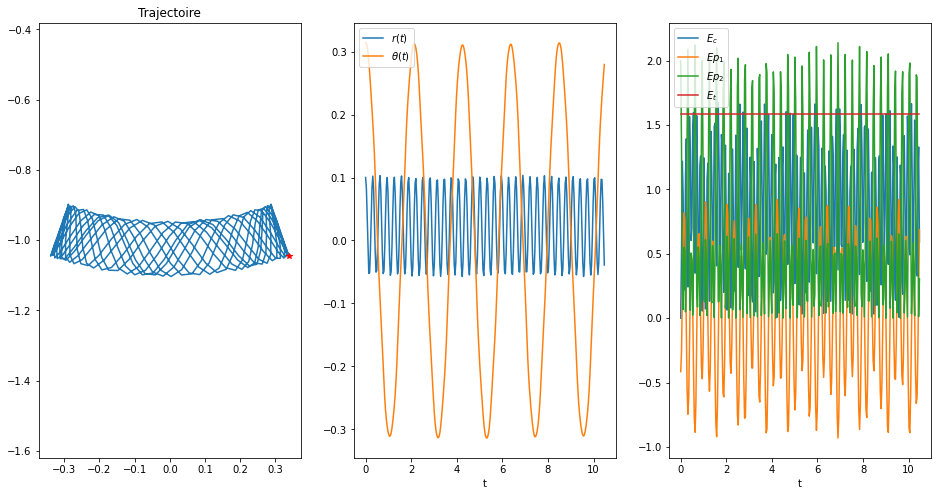

In [14]:
Omega1 = 3.0
Omega2 = 20.0
Alpha  = Omega1**2/Omega2**2
Y0 = [np.pi/10, 0.1, 0., 0.]
Solution(Y0,5*2*np.pi/Omega1,300)

### cas grandes oscillations

Solution pour omega1=3.0 omega2=20.0 alpha=0.0225


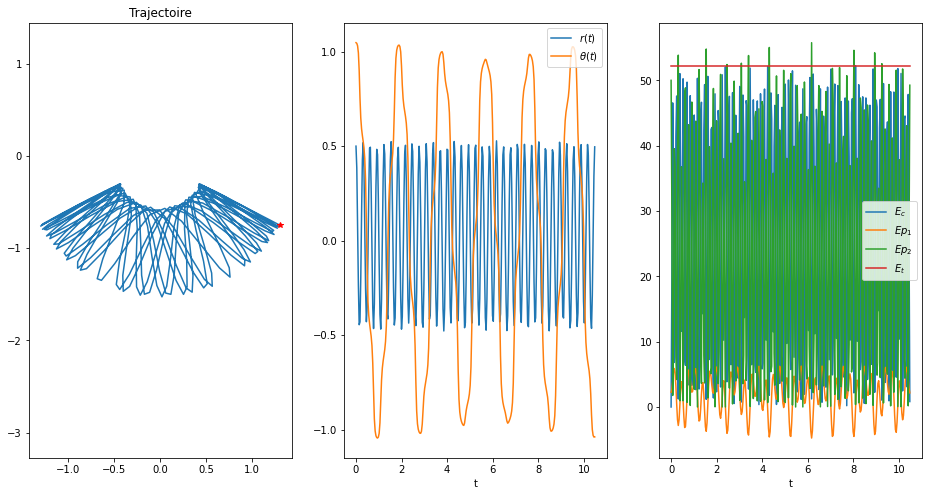

In [15]:
Y0 = [np.pi/2, 0.5, 0., 0.]
Y0 = [np.pi/3, 0.5, 0., 0.]
Solution(Y0,5*2*np.pi/Omega1,300)

Solution pour omega1=3.0 omega2=20.0 alpha=0.0225


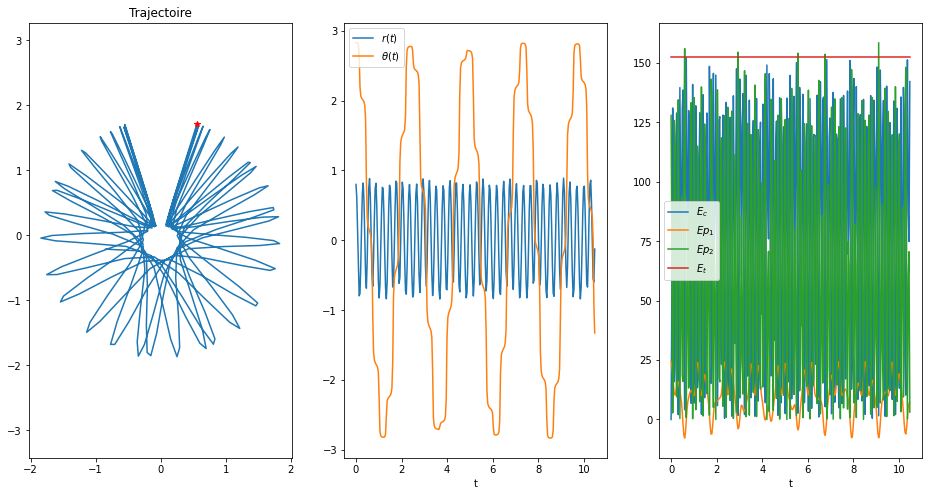

In [16]:
Y0 = [0.9*np.pi, 0.8, 0., 0.]
Solution(Y0,5*2*np.pi/Omega1,300)

## Application saut élastique

paramètres:

 - poids  m=60 kg
 - corde élastique l0=30m avec un allongement d'une fois sa longueur à vide
 
1. phase 1: transfert énérgie potentiel en énergie cinétique 

$$ mg l_0 = \frac{1}{2} m v_0^2 \mbox{ d'où } V_0 = \sqrt{2g l_0}$$

2. conditions initiales: 

   - saut vertical: $\theta = 0 , r = 0$ et $\dot{\theta} = 0, \dot{r} = V_0$
   - avec un angle: $\theta = \theta_0 , r = 0$ et $\dot{\theta} = 0, \dot{r} = V_0$
   
3. calcul du coefficient k:
   - transformation énergie cinétique en potentiel élastique (alongement de $2 l_0$)
   
   $$ \frac{1}{2} k  l_0^2 =  \frac{1}{2} m v_0^2  $$
   
   d'où
   
   $$ k = \frac{mg}{l_0}$$

In [18]:
# parametres
G  = 9.81
L0 = 30.0
M  = 60.
V0 = np.sqrt(2*G*L0)
K  = M*G/(L0)
Omega1 = np.sqrt(G/L0)
Omega2 = np.sqrt(K/M)
Alpha  = Omega1**2/Omega2**2

### saut vertical

Solution pour omega1=0.5718391382198319 omega2=0.5718391382198319 alpha=1.0


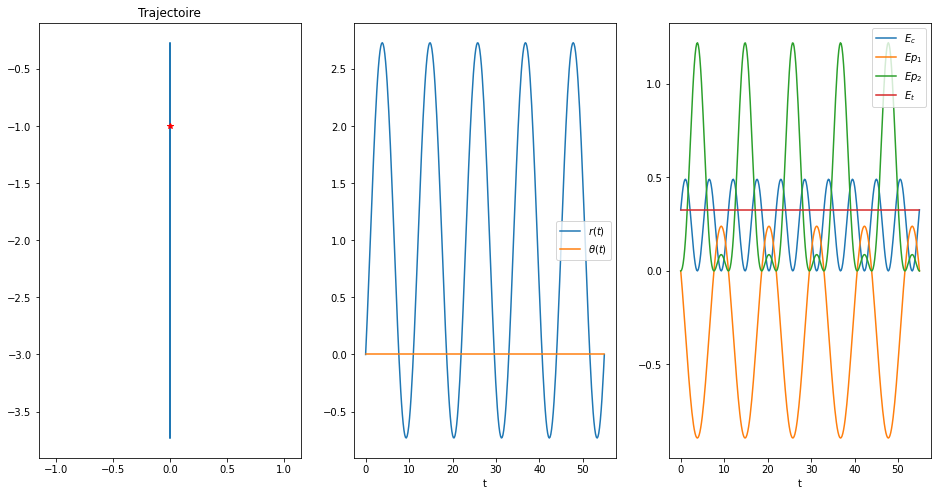

In [19]:
Y0 = [0.0, 0.0, 0., V0/L0]
Solution(Y0,5*2*np.pi/Omega1,300)

### saut incliné

Solution pour omega1=0.5718391382198319 omega2=0.5718391382198319 alpha=1.0


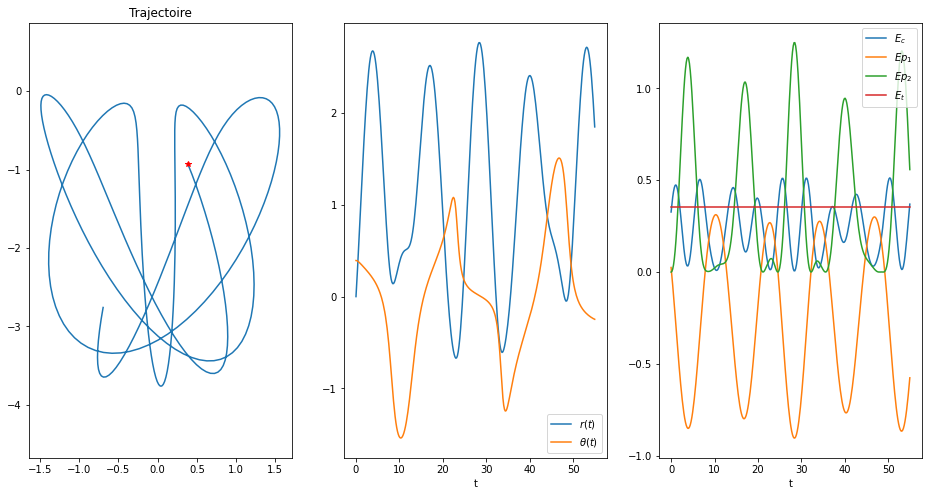

In [20]:
Y0 = [np.pi/8, 0.0, 0., V0/L0]
Solution(Y0,5*2*np.pi/Omega1,300)

Solution pour omega1=0.5718391382198319 omega2=0.5718391382198319 alpha=1.0


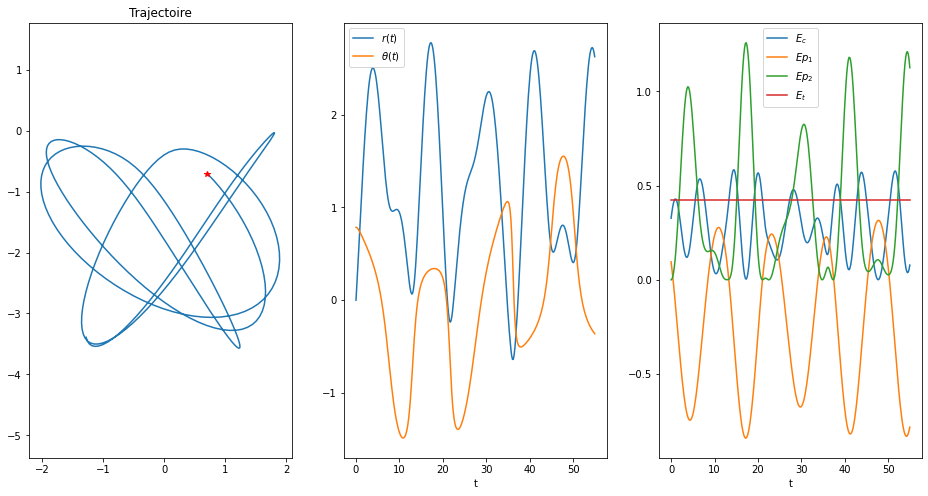

In [21]:
Y0 = [np.pi/4, 0.0, 0., V0/L0]
Solution(Y0,5*2*np.pi/Omega1,300)

## Annexe I: intégration en coordonnées cartésienne (y,z)

$$ \ddot{y} = - \omega_2^2 \frac{r-l_0}{r} y$$

$$ \ddot{z} = - \omega_2^2 \frac{r-l_0}{r} z - g$$

In [ ]:
Omega2 = Omega1/np.sqrt(Alpha)
print(Omega1,Omega2,Alpha)
L0 = 1.0
G  = 9.0
def SmbYZ(Y,t):
    R = np.sqrt(Y[0]**2+Y[1]**2)
    C = Omega2**2*(R-L0)/R
    return np.array([Y[2],Y[3],-C*Y[0], -C*Y[1] - G])
    

In [ ]:
Y0  = np.array([0.34,-1.046,0,0])
TT  = np.linspace(0,5*2*np.pi/Omega1,500)
print(SmbYZ(Y0,0))
sol = odeint(SmbYZ, Y0, TT)
XX  = sol[:,0]
YY  = sol[:,1]

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(XX[0],YY[0],'*r')
plt.plot(XX,YY)
plt.title("trajectoire")
plt.axis('equal')
plt.subplot(1,2,2)
plt.plot(TT,XX,label="x(t)")
plt.plot(TT,YY,label="y(t)")
plt.xlabel('t')
plt.legend()

On retrouve bien la même trajectoire, mais l'analyse est moins simple (comparer les courbes $x(t),y(t)$ avec $\theta(t),r(t)$

## FIN de la leçon